Inisialisasi Library


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Identifikasi dataset


In [25]:
df = pd.read_csv('~/PDS/cars.csv')
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Analisis variabel price


In [3]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

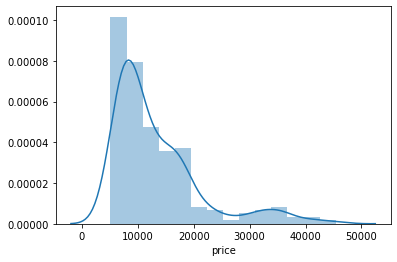

In [4]:
sns.distplot(df['price'])

In [9]:
print(df['price'].skew())
print(df['price'].kurt())

1.7776781560914454
3.051647871396399


Hubungan antara price dengan variabel numerical lain:
1.   horsepower
2.   enginesize



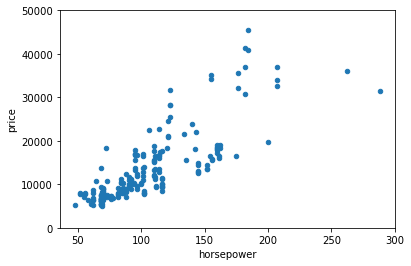

In [10]:
var = 'horsepower'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,50000));

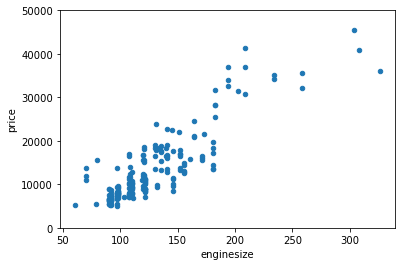

In [11]:
var = 'enginesize'
data = pd.concat([df['price'], df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,50000));

Analisis hubungan antara variabel price dengan variable kategorikal
1. carbody
2. fueltype
3. enginetype
4. drivewheel

Analisis menggunakan box plot. Cara membaca boxplot
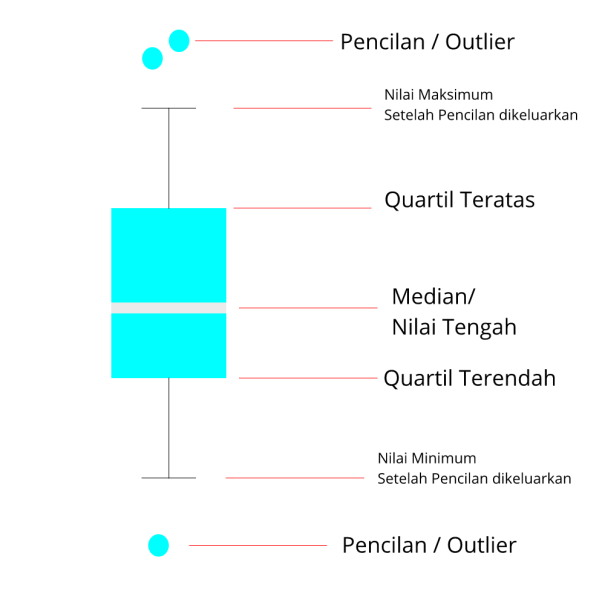

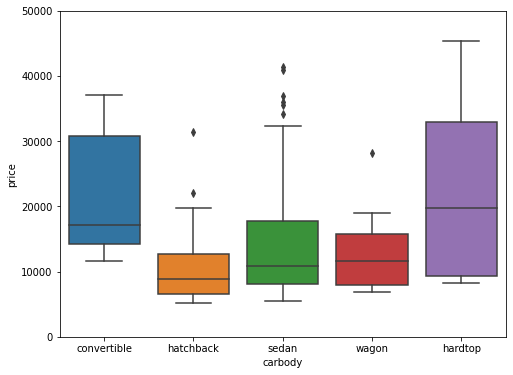

In [ ]:
Cvar = 'carbody'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=50000);

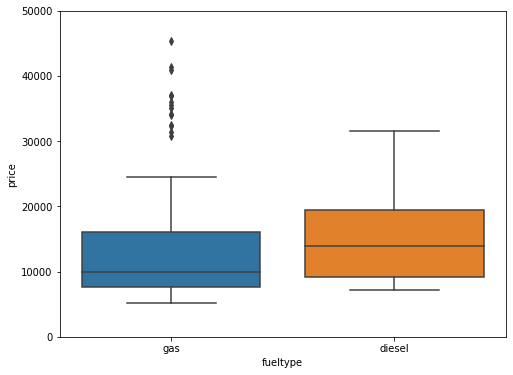

In [ ]:
var = 'fueltype'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=50000);

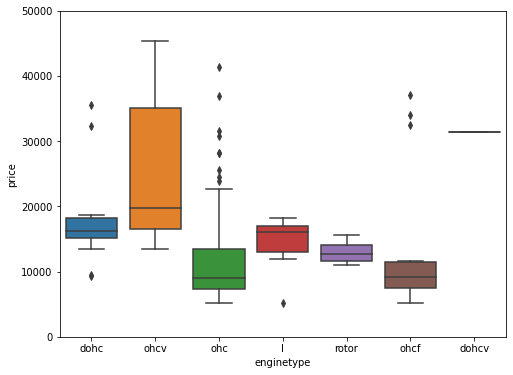

In [ ]:
var = 'enginetype'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=50000);

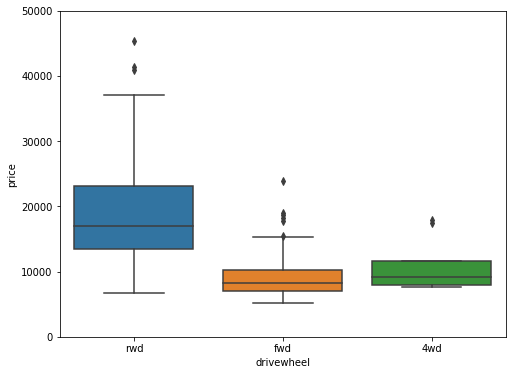

In [ ]:
var = 'drivewheel'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=50000);

Membuat heatmap untuk mengetahui korelasi antar semua variable yang ada

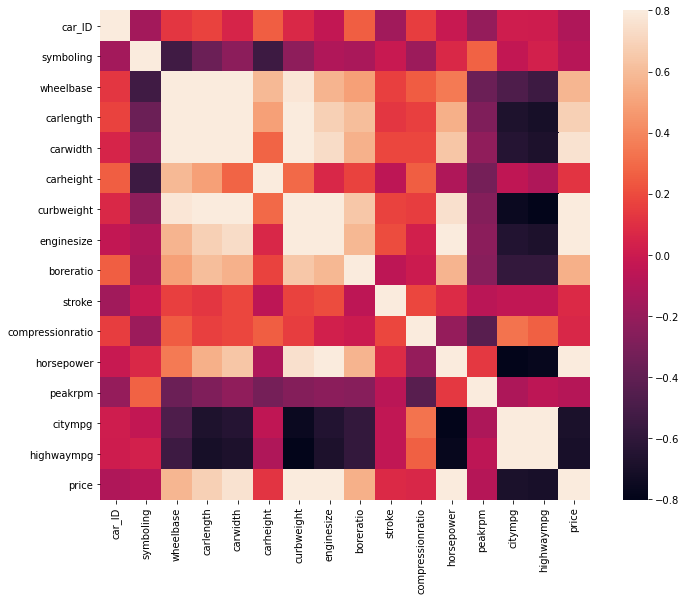

In [12]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

Membuat heatmap untuk mencari hubungan terkuat dari 10 variable terhadap variable price

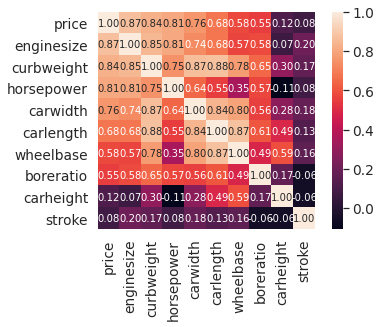

In [13]:
k = 10 
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Membuat grafik scatter untuk menunjukkan hubungan antar variable 
['price', 'enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'wheelbase', 'boreratio']

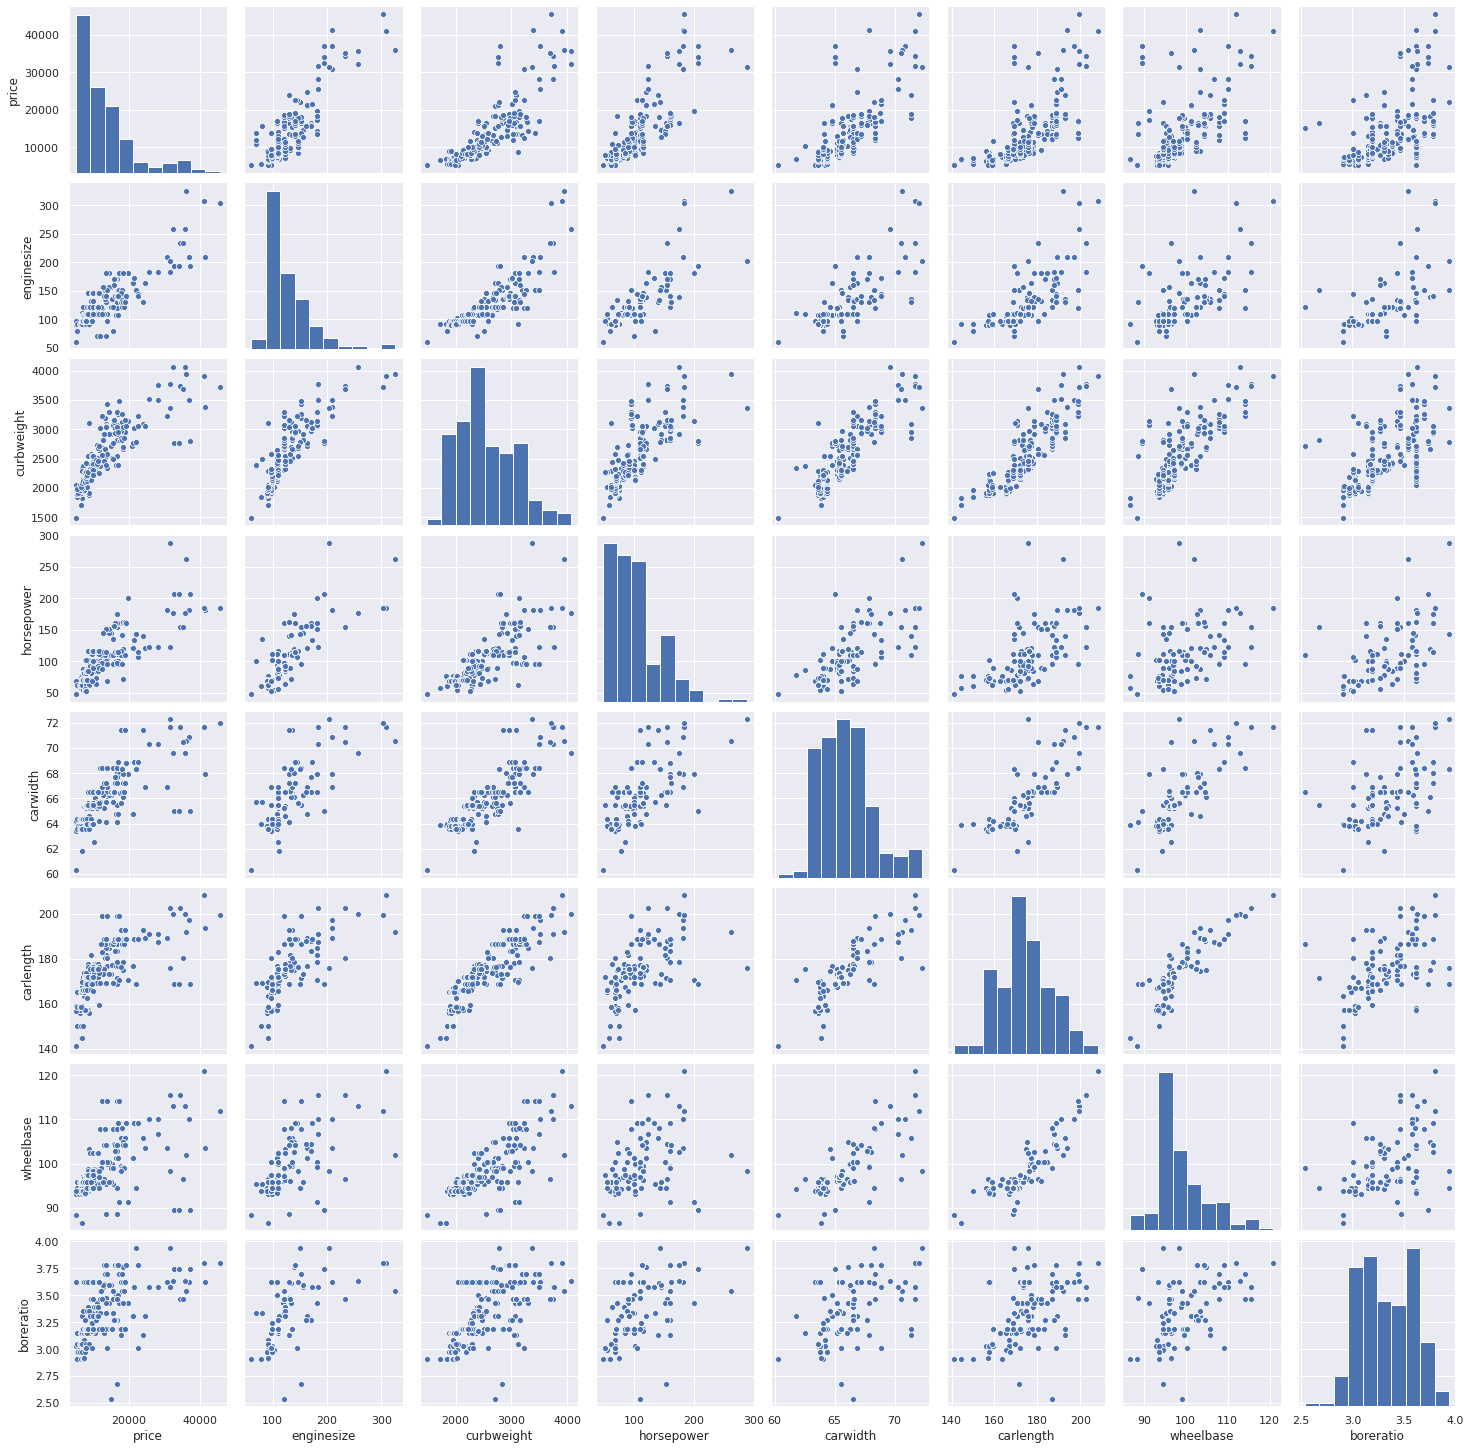

In [14]:
sns.set()
cols = ['price', 'enginesize', 'curbweight', 'horsepower', 'carwidth', 'carlength', 'wheelbase', 'boreratio']
sns.pairplot(df[cols], size = 2.5)
plt.show();

Analisis Univariate

In [21]:
price_scaled = StandardScaler().fit_transform(df['price'][:,np.newaxis]);
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range= price_scaled[price_scaled[:,0].argsort()][-10:]

print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

[[-1.02376194]
 [-1.01962107]
 [-1.01409991]
 [-0.99490134]
 [-0.98975663]
 [-0.98850182]
 [-0.97595374]
 [-0.96679363]
 [-0.96679363]
 [-0.90116715]]

outer range (high) of the distribution:
[[2.60388944]
 [2.62346446]
 [2.73288376]
 [2.7948713 ]
 [2.85133768]
 [2.96176083]
 [2.980332  ]
 [3.4737227 ]
 [3.5182684 ]
 [4.03085767]]


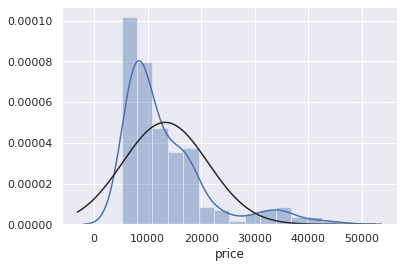

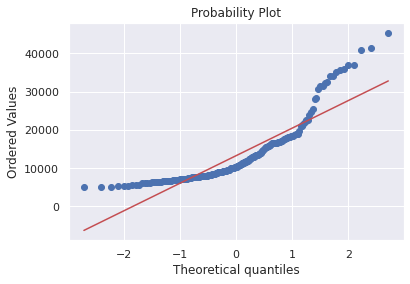

In [26]:
sns.distplot(df['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

In [28]:
#applying log transformation
df['price'] = np.log(df['price'])

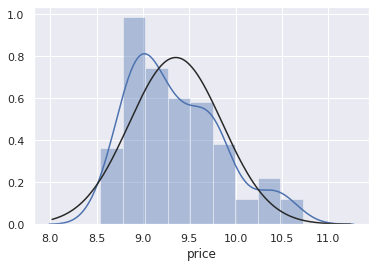

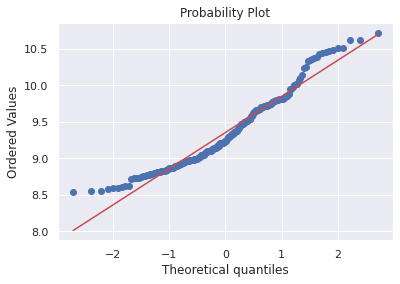

In [29]:
#transformed histogram and normal probability plot
sns.distplot(df['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

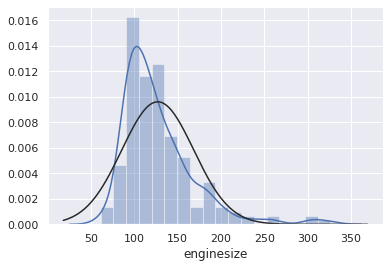

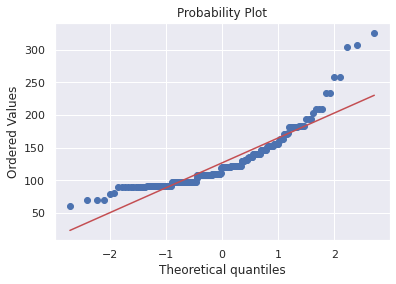

In [30]:
sns.distplot(df['enginesize'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['enginesize'], plot=plt)

In [31]:
#applying log transformation
df['enginesize'] = np.log(df['enginesize'])

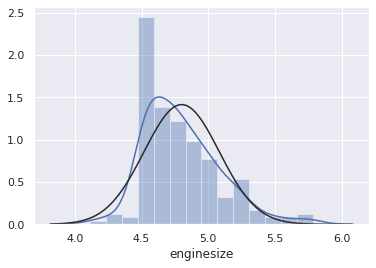

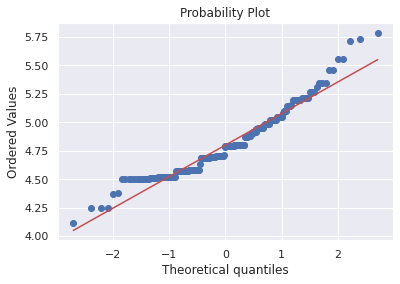

In [32]:
sns.distplot(df['enginesize'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['enginesize'], plot=plt)